**Simulated Annealing Lab 1**

In [0]:
#import statements
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
import math
from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

**Exercise 1**
The goal of simulated annealing is to maximize the performance of a model relative to a fitness function defined over the model parameters you are seeking to optimize. In Exercise 2, you will apply simulated annealing coded in scipy to a one-dimensional problem in which you seek the value of X that maximizes the output of a function called fitnessFunction. But first you must write code that implements the function, which is the product of m and n:

m = 1+ cos(0.04v)2

n = exp(−v2 /(20000))

**Exercise 2**
Display the fitness surface. To do this, make the wave fitness with 1000 points starting at x = -500 and ending at x = 500 (using Data > Change Wave Scaling). Set the yvalues in fitness to the corresponding value of the fitnessFunction(). Display fitness and include the graph in your lab report.

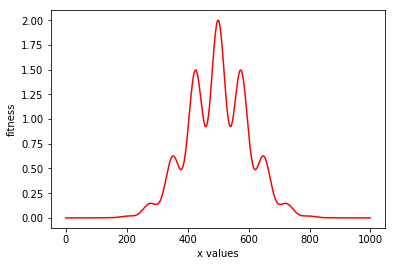

In [5]:
#fitness function
def f(x):
    """ Function to minimize."""
    return (1 + np.cos(0.04*x)**2) * (np.exp(-x**2/20000))
  
  
x1 = np.arange(-500,500,1)
arr_func = np.empty(len(x1))
for i in range(len(x1)):
  arr_func[i] = f(x1[i])

plt.ylabel('fitness')
plt.xlabel('x values')
plt.plot(arr_func, color = 'red')
plt.show()



**Exercise 3**
Run the algorithm with an initial X value of 250 and an initial temperature of 10. Plot the trajectory of the annealing algorithm along the fitness surface, Include the graph in your lab report. Slowly increase the temperature until you find the peak about 90% of the time. Report this temperature and explain its significance in terms of the relationship between the search radius and the dimensions of the width of the fitness curve.

In [0]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = 250
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = 10
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [0]:
interval = (-500, 500) #changed for exercise 3

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [0]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [0]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [0]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [0]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (cost - new_cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [0]:
def temperature(fraction):
    """ Example of temperature increasing as the process goes on."""
    return (10+fraction)

In [15]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=True);

Step # 0/1000 : T =   10, state =  250, cost = 0.0749, new_state =  250, new_cost = 0.0749 ...
Step # 1/1000 : T =   10, state =  250, cost = 0.0749, new_state =  250, new_cost = 0.075 ...
Step # 2/1000 : T =   10, state =  250, cost = 0.075, new_state =  250, new_cost = 0.0747 ...
Step # 3/1000 : T =   10, state =  250, cost = 0.0747, new_state =  250, new_cost = 0.0744 ...
Step # 4/1000 : T =   10, state =  250, cost = 0.0744, new_state =  250, new_cost = 0.0745 ...
Step # 5/1000 : T =   10, state =  250, cost = 0.0745, new_state =  250, new_cost = 0.0746 ...
Step # 6/1000 : T =   10, state =  250, cost = 0.0746, new_state =  250, new_cost = 0.074 ...
Step # 7/1000 : T =   10, state =  250, cost = 0.074, new_state =  250, new_cost = 0.0744 ...
Step # 8/1000 : T =   10, state =  250, cost = 0.0744, new_state =  250, new_cost = 0.0736 ...
Step # 9/1000 : T =   10, state =  250, cost = 0.0736, new_state =  250, new_cost = 0.0746 ...
Step #10/1000 : T =   10, state =  250, cost = 0.0746,

In [20]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

state
c

0.3092145995467456

In [0]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

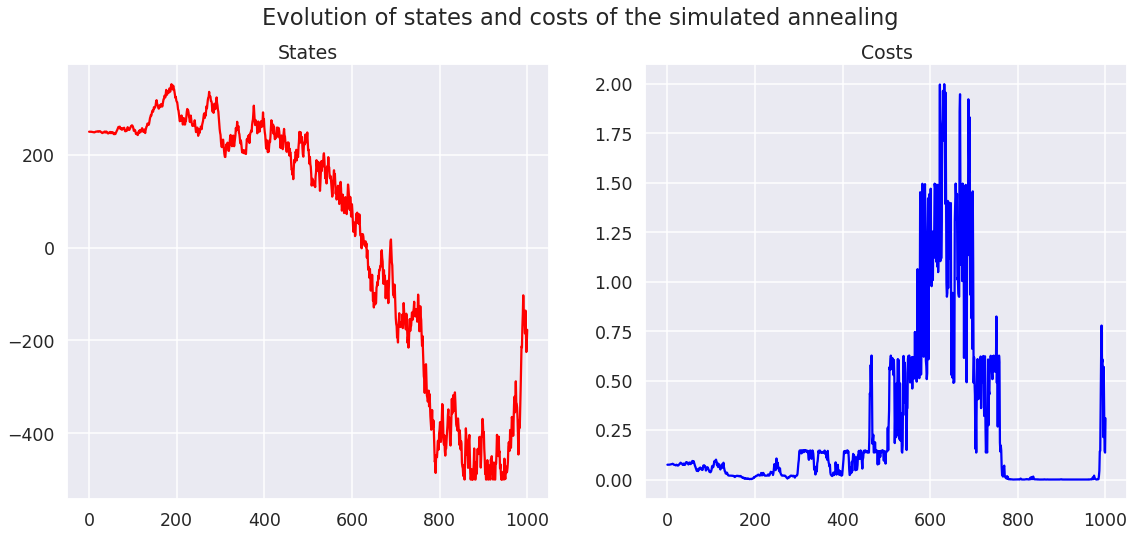

In [22]:
see_annealing(states, costs)